# ATTENTION: As folium is not display by the Github viewer, for this homework please use this notebook viewer: http://nbviewer.jupyter.org

In [21]:
import os
import pandas as pd
import json
import folium
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Part 1.

## Import map of Europe

In [3]:
europe_geo_path = r'topojson/europe.topojson.json'
europe_json_data = open(europe_geo_path)

m_europe = folium.Map(location=[55.1141, 20.2752], zoom_start=3, tiles='cartodbpositron')
#folium.TopoJson(europe_json_data, "objects.europe").add_to(m_europe)
m_europe

## Unemployment rate in EU

By recent data, we prefered to choose a yearly indices and being able to go back ten year before than monthly report because it seems that monthy reports were only available for the last year and thus won't show long term dynamics.

### Export information

* Source : http://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=une_rt_a&lang=en
* Percentage of active population
* Gender : Total
* Countries: only EU countries (no aggregated values, no US, no Japan)

From there, we build a new dataframe per countries, per year


In [4]:
raw = pd.read_excel("data/eurostat.xlsx")
raw.head(n=10)

,TIME,GEO,AGE,UNIT,SEX,Value,Flag and Footnotes
0,2007,Belgium,Total,Percentage of active population,Total,7.5,NaN
1,2007,Bulgaria,Total,Percentage of active population,Total,6.9,NaN
2,2007,Czech Republic,Total,Percentage of active population,Total,5.3,NaN
3,2007,Denmark,Total,Percentage of active population,Total,3.8,NaN
4,2007,Germany (until 1990 former territory of the FRG),Total,Percentage of active population,Total,8.5,NaN
5,2007,Estonia,Total,Percentage of active population,Total,4.6,NaN
6,2007,Ireland,Total,Percentage of active population,Total,4.7,NaN
7,2007,Greece,Total,Percentage of active population,Total,8.4,NaN
8,2007,Spain,Total,Percentage of active population,Total,8.2,NaN
9,2007,France,Total,Percentage of active population,Total,8.0,NaN


In [5]:
countries = raw["GEO"].drop_duplicates().values
countries.sort()
years = raw["TIME"].drop_duplicates().values
years.sort()

#df = pd.DataFrame(countries)
rows = []
countries_final = []
for country in countries:
    country_label = country
    if "Germany" in country:
        country_label = "Germany"
    row = [country_label]
    countries_final.append(country_label)
    for year in years:
        tmp = round(raw[(raw["TIME"] == year) & (raw["GEO"] == country)]["Value"].values[0], 1)
        row.append(tmp)
        
    rows.append(row)

countries = countries_final
columns = ["Country"] + list(map(str, years.tolist()))
df = pd.DataFrame(rows, columns=columns)
df.set_index("Country")

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Austria,4.9,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0
Belgium,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8
Bulgaria,6.9,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6
Croatia,9.9,8.6,9.3,11.8,13.7,15.8,17.4,17.2,16.1,13.4
Cyprus,3.9,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0
Czech Republic,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0
Denmark,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2
Estonia,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8
Finland,6.9,6.4,8.2,8.4,7.8,7.7,8.2,8.7,9.4,8.8


## Create Chloropeth, merge TopoJSON and Stats data

We found that the map contains more countries than we have. Let's add rows of NaN in our data.

In [6]:
data = json.load(open(europe_geo_path))
countries_in_geo_json = list(map(lambda x: x["properties"]["NAME"], data["objects"]["europe"]["geometries"]))

missing_countries_in_df = set(countries_in_geo_json) - set(countries)
missing_countries_in_df

{'Albania',
 'Andorra',
 'Armenia',
 'Azerbaijan',
 'Belarus',
 'Bosnia and Herzegovina',
 'Faroe Islands',
 'Georgia',
 'Holy See (Vatican City)',
 'Israel',
 'Liechtenstein',
 'Monaco',
 'Montenegro',
 'Republic of Moldova',
 'Russia',
 'San Marino',
 'Serbia',
 'Switzerland',
 'The former Yugoslav Republic of Macedonia',
 'Ukraine'}

We also check we did not left out any country

In [7]:
set(countries) - set(countries_in_geo_json)

set()

In [8]:
new_countries = []
for country in missing_countries_in_df:
    new_countries.append([country] + [None] * len(years))
    
new_df = pd.DataFrame(new_countries, columns=columns)
#Set new index to keep coherent indexing in the merged dataframe
new_df = new_df.set_index(np.arange(31, 51))

merged_df = pd.concat([df, new_df])

To be able to answer the last question from the first part, we will complete the Switzerland data with the file *amstat.xlsx*

In [9]:
swiss_df = pd.read_excel('data/amstat.xlsx')
swiss_df.head()

,Canton,Sexe,Mois,Janvier 2006,Février 2006,Mars 2006,Avril 2006,Mai 2006,Juin 2006,Juillet 2006,...,Avril 2016,Mai 2016,Juin 2016,Juillet 2016,Août 2016,Septembre 2016,Octobre 2016,Novembre 2016,Décembre 2016,Total
0,NaN,NaN,Mesures,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,...,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage,Taux de chômage
1,Zurich,Hommes,NaN,3.9,3.8,3.6,3.3,3.1,3,2.9,...,3.9,3.8,3.7,3.7,3.6,3.7,3.7,3.9,4.1,3.2
2,Zurich,Femmes,NaN,4.1,3.9,3.9,3.7,3.6,3.5,3.4,...,3.3,3.3,3.3,3.3,3.4,3.5,3.5,3.5,3.5,3.1
3,Berne,Hommes,NaN,3,2.9,2.7,2.5,2.2,2,2,...,2.9,2.8,2.6,2.6,2.6,2.6,2.7,3,3.3,2.4
4,Berne,Femmes,NaN,3,2.9,2.9,2.8,2.6,2.5,2.5,...,2.5,2.5,2.4,2.4,2.5,2.5,2.5,2.6,2.6,2.3


As we can see, the data is split by canton and by sex. We will average it every year in order to get the same data that we have for the other countries

In [10]:
swiss_df = swiss_df.drop(['Canton', 'Sexe', 'Mois', 'Total'], axis=1)
swiss_df = swiss_df.drop(0, axis=0)
swiss_df = swiss_df.apply(pd.to_numeric)
swiss_df = swiss_df.mean(axis=0)

years = ['Country', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015' ,'2016']
yearly_data = ['Switzerland']
for year in years[1:]:
    yearly_data.append(swiss_df.filter(like=year).mean())

swiss_yearly_data = pd.Series(data=yearly_data, index=years)
swiss_yearly_data

Country    Switzerland
2007           2.45016
2008           2.27893
2009           3.31053
2010           3.12013
2011           2.47138
2012           2.55204
2013           2.77264
2014           2.64717
2015           2.74528
2016           2.88192
dtype: object

In [11]:
#45 is index of Switzerland
merged_df.loc[45] = swiss_yearly_data

In [23]:
def make_maps(year):
    m_europe = folium.Map(location=[55.1141, 20.2752], zoom_start=3, tiles='cartodbpositron')

    m_europe.choropleth(
        geo_data=data,
        data=merged_df,
        topojson="objects.europe",
        columns=['Country', year],
        key_on='feature.properties.NAME',
        fill_color='BuPu',
        fill_opacity=0.7, 
        line_opacity=0.5,
        legend_name='Unemployment Rate (%)'
    )

    return m_europe

In [24]:
interact(make_maps, year=['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']);

To compare Switzerland unemployment rate to that of the rest of Europe, we will compute the difference with the average

In [25]:
avg_df = merged_df.mean()
switz = merged_df.loc[45]
switz = switz.drop('Country')
compare = pd.DataFrame([avg_df, switz])
compare['Country'] = ['Average', 'Switzerland']
compare = compare.set_index('Country')
compare

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,
Average,6.226567,6.146217,8.644079,9.685004,9.527231,10.089126,10.405395,9.817099,9.088915,8.261935
Switzerland,2.450157,2.278931,3.310535,3.120126,2.471384,2.552044,2.772642,2.647170,2.745283,2.881918


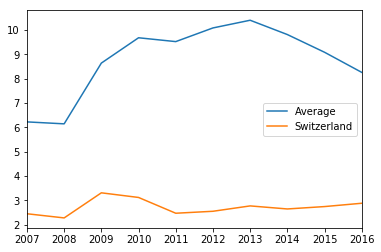

In [26]:
compare.loc['Average'].plot(legend='Average')
compare.loc['Switzerland'].plot(legend='Switzerland')
plt.show()

We can see that Switzerland has a much lower unemployment rate than the rest of Europe

## 2. Unemployment rates in Switzerland

The data we use is from September 2017 as it seemed complete and coherent

In [27]:
swiss_canton_df = pd.read_excel('data/swiss_cantons_201709.xlsx')
swiss_canton_df = swiss_canton_df.drop(26, axis=0)
swiss_canton_df = swiss_canton_df.drop('Mesures', axis=1)
swiss_canton_df = swiss_canton_df.set_index('Canton').sort_index()
swiss_canton_df = swiss_canton_df.apply(pd.to_numeric)
swiss_canton_df['ID'] = ['AR', 'AI', 'AG', 'BE', 'BL', 'BS', 'FR', 'GE', 'GL', 'GR', 'JU', 'LU', 'NE', 'NW', 'OW', 'SH', 'SZ', 'SO', 'SG', 'TI', 'TG', 'UR', 'VS', 'VD', 'ZG', 'ZH']
swiss_canton_df

,Taux de chômage,Chômeurs inscrits,Demandeurs d'emploi,Demandeurs d'emploi non chômeurs,ID
Canton,,,,,
Appenzell Rhodes-Extérieures,1.7,523,866,343,AR
Appenzell Rhodes-Intérieures,0.7,62,102,40,AI
Argovie,2.9,10684,15145,4461,AG
Berne,2.4,13658,18385,4727,BE
Bâle-Campagne,2.8,4082,5540,1458,BL
Bâle-Ville,3.5,3455,5168,1713,BS
Fribourg,2.7,4466,7837,3371,FR
Genève,5.2,12234,15497,3263,GE
Glaris,1.8,416,713,297,GL


In [31]:
swiss_geo_path = r'topojson/ch-cantons.topojson.json'
swiss_json_data = json.load(open(swiss_geo_path))

m_swiss = folium.Map(location=[46.8, 8.2], zoom_start=8, tiles='cartodbpositron')
m_swiss.choropleth(
    geo_data=swiss_json_data,
    data=swiss_canton_df,
    topojson="objects.cantons",
    columns=['ID', 'Taux de chômage'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Unemployment Rate of Swiss Cantons - September 2017 (%)'
)

m_swiss

We can see that the unemployment rate is higher in the french and italian part of Switzerland compared to the german part with the general unemployment rate.

Let's now see what happens when we do the same thing without people who already have a job and are looking for a new one.

In [32]:
taux de chomage = (chomeur inscrits / pop active) * 100
pop active = chomeur inscrits / (taux de chomage / 100)

SyntaxError: invalid syntax (<ipython-input-32-d596ec2bea99>, line 1)

In [33]:
swiss_canton_df['Pop. Active'] = round(swiss_canton_df['Chômeurs inscrits'] / (swiss_canton_df['Taux de chômage'] / 100))
swiss_canton_df['Taux de chômage non inscrit'] = (swiss_canton_df['Demandeurs d\'emploi non chômeurs'] / swiss_canton_df['Pop. Active']) * 100
swiss_canton_df

,Taux de chômage,Chômeurs inscrits,Demandeurs d'emploi,Demandeurs d'emploi non chômeurs,ID,Pop. Active,Taux de chômage non inscrit
Canton,,,,,,,
Appenzell Rhodes-Extérieures,1.7,523,866,343,AR,30765.0,1.114903
Appenzell Rhodes-Intérieures,0.7,62,102,40,AI,8857.0,0.451620
Argovie,2.9,10684,15145,4461,AG,368414.0,1.210866
Berne,2.4,13658,18385,4727,BE,569083.0,0.830635
Bâle-Campagne,2.8,4082,5540,1458,BL,145786.0,1.000096
Bâle-Ville,3.5,3455,5168,1713,BS,98714.0,1.735316
Fribourg,2.7,4466,7837,3371,FR,165407.0,2.038003
Genève,5.2,12234,15497,3263,GE,235269.0,1.386923
Glaris,1.8,416,713,297,GL,23111.0,1.285102


In [35]:
m_swiss_2 = folium.Map(location=[46.8, 8.2], zoom_start=8, tiles='cartodbpositron')
m_swiss_2.choropleth(
    geo_data=swiss_json_data,
    data=swiss_canton_df,
    topojson="objects.cantons",
    columns=['ID', 'Taux de chômage non inscrit'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Unemployment Rate of Swiss Cantons - September 2017 (%)',
)

m_swiss_2

We can see here that with this new metrics (only unemployed people that never had a job before) the french and italians cantons still have higher unemployment rate than the german ones. But it is not as different as the first map.